# Investigación 1

## Air pollutant emissions

A continuación se presentan los pasos realizados para acondicionar el conjunto de datos Air Pollutant Emissions, provisto por el Ministerio de Ambiente de Nueva Zelanda (https://catalogue.data.govt.nz/dataset/air-pollutant-emissions#dataset-resources)

Primeramente procedemos a cargar las bibliotecas necesarias:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

Cargamos el archivo:

In [2]:
air_pollutant = pd.read_csv("air-pollutant-emissions.csv")

Visualizamos las primeras lineas:

In [3]:
air_pollutant.head()

,sub_sector,activity,sector,PM10,PM2_5,CO,NOx,SO2,site,file,sheet
0,Agriculture/forestry/fishing (combustion),Energy-related activities,Fuel combustion in other sectors,480,450,3300.0,10500.0,2500.0,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
1,Animal housings,Agriculture,Animal housings,460,40,NaN,NaN,NaN,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
2,Aviation (domestic),Energy-related activities,Transport,12,12,1900.0,2600.0,170.0,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
3,Aviation (international),Energy-related activities,Transport,6,6,600.0,1300.0,55.0,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
4,Biomass burning: forest land,Field burning of agricultural residues & bioma...,Biomass burning: forest land,5000,3700,30100.0,1300.0,280.0,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary


Se nota que el conjunto de datos presenta una serie de problemas, por ejemplo, los nombres de las columnas, aunque son significativos, podrían ser más claros, por otro lado, las variables en varias categorías son cadenas de texto. Estas pueden ser codificadas de manera numérica para poder extraer información de los campos.

Iniciamos con la colocacion de las columnas:

In [4]:
column_names = ['Sub sector', 'Actividad', 'Sector', 'Diámetro < 10 um', 'Diámetro < 25 um', 'Monóxido de carbono', 'Óxido de Nitrógeno', 'Dióxido de Sulfuro', 'Sitio', 'Archivo', 'Hoja']

In [5]:
air_pollutant = pd.read_csv("air-pollutant-emissions.csv", names = column_names)
air_pollutant.head()

,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro,Sitio,Archivo,Hoja
0,sub_sector,activity,sector,PM10,PM2_5,CO,NOx,SO2,site,file,sheet
1,Agriculture/forestry/fishing (combustion),Energy-related activities,Fuel combustion in other sectors,480,450,3300,10500,2500,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
2,Animal housings,Agriculture,Animal housings,460,40,NaN,NaN,NaN,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
3,Aviation (domestic),Energy-related activities,Transport,12,12,1900,2600,170,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
4,Aviation (international),Energy-related activities,Transport,6,6,600,1300,55,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary


Nótese que se agregaron los nuevos títulos de las columnas, sin embargo, no se eliminaron los títulos anteriores. Procedemos a eliminar la fila 0.

In [6]:
air_pollutant.drop(0, axis=0, inplace = True)
air_pollutant = air_pollutant.reset_index(drop=True)
air_pollutant.head()

,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro,Sitio,Archivo,Hoja
0,Agriculture/forestry/fishing (combustion),Energy-related activities,Fuel combustion in other sectors,480,450,3300,10500,2500,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
1,Animal housings,Agriculture,Animal housings,460,40,NaN,NaN,NaN,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
2,Aviation (domestic),Energy-related activities,Transport,12,12,1900,2600,170,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
3,Aviation (international),Energy-related activities,Transport,6,6,600,1300,55,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
4,Biomass burning: forest land,Field burning of agricultural residues & bioma...,Biomass burning: forest land,5000,3700,30100,1300,280,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary


Procederemos a obtener la lista con todas las variables de la columna Sub sector.

In [7]:
subSector_coding = pd.unique(air_pollutant['Sub sector'])

Ahora las codificamos para así tener valores numéricos.

In [8]:
print('Codificación para la categoría Sub sector: \n')
for index in range(len(subSector_coding)):
    air_pollutant['Sub sector'].replace(to_replace = subSector_coding[index], value = index + 1, inplace = True)
    print(subSector_coding[index], ' = ', index + 1)
air_pollutant.head()

Codificación para la categoría Sub sector: 

Agriculture/forestry/fishing (combustion)  =  1
Animal housings  =  2
Aviation (domestic)  =  3
Aviation (international)  =  4
Biomass burning: forest land  =  5
Biomass burning: grasslands  =  6
Commercial/institutional (combustion)  =  7
Construction dust (fugitive)  =  8
Field burning of agricultural residues  =  9
Incineration of quarantine waste  =  10
Manufacture of solid fuels & other energy industries (combustion)  =  11
Manufacturing & construct'n (combustion)  =  12
Metal industries (non-combustion)  =  13
Mineral products (non-combustion)  =  14
On-road vehicles  =  15
Open burning of waste  =  16
Petroleum refining (combustion)  =  17
Pipeline transport (combustion)  =  18
Production of chemicals (non-combustion)  =  19
Public electricity & heat production (combustion)  =  20
Pulp and paper production (non-combustion)  =  21
Rail  =  22
Residential (combustion - home heating)  =  23
Sealed road dust  =  24
Shipping (domestic)  = 

,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro,Sitio,Archivo,Hoja
0,1,Energy-related activities,Fuel combustion in other sectors,480,450,3300,10500,2500,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
1,2,Agriculture,Animal housings,460,40,NaN,NaN,NaN,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
2,3,Energy-related activities,Transport,12,12,1900,2600,170,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
3,4,Energy-related activities,Transport,6,6,600,1300,55,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
4,5,Field burning of agricultural residues & bioma...,Biomass burning: forest land,5000,3700,30100,1300,280,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary


Haremos lo mismo con las columnas Actividad y Sector

In [9]:
variables = pd.unique(air_pollutant['Actividad'])
print('Codificación para la categoría Actividad: \n')
for index in range(len(variables)):
    air_pollutant['Actividad'].replace(to_replace = variables[index], value = index + 1, inplace = True)
    print(variables[index], ' = ', index + 1)

variables = pd.unique(air_pollutant['Sector'])
print('\nCodificación para la categoría Sector: \n')
for index in range(len(variables)):
    air_pollutant['Sector'].replace(to_replace = variables[index], value = index + 1, inplace = True)
    print(variables[index], ' = ', index + 1)
air_pollutant.head()

Codificación para la categoría Actividad: 

Energy-related activities  =  1
Agriculture  =  2
Field burning of agricultural residues & biomass burning  =  3
Construction dust  =  4
Waste  =  5
Industrial non-combustion  =  6
Road dust  =  7

Codificación para la categoría Sector: 

Fuel combustion in other sectors  =  1
Animal housings  =  2
Transport  =  3
Biomass burning: forest land  =  4
Biomass burning: grasslands  =  5
Construction dust (fugitive)  =  6
Field burning of agricultural residues  =  7
Incineration of quarantine waste  =  8
Fuel combustion in energy industries  =  9
Fuel combustion in manufacturing and construction  =  10
Metal industries (non-combustion)  =  11
Mineral products (non-combustion)  =  12
Open burning of waste  =  13
Production of chemicals (non-combustion)  =  14
Pulp and paper production (non-combustion)  =  15
Sealed road dust  =  16
Unsealed road dust  =  17


,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro,Sitio,Archivo,Hoja
0,1,1,1,480,450,3300,10500,2500,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
1,2,2,2,460,40,NaN,NaN,NaN,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
2,3,1,3,12,12,1900,2600,170,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
3,4,1,3,6,6,600,1300,55,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary
4,5,3,4,5000,3700,30100,1300,280,summary,AR_OA2018_2015_NZ_National_air_emissions_inven...,Summary


Ahora eliminaremos las columnas 'Sitio', 'Archivo' y 'Hoja' porque sólo aportan información de localización de los datos respecto a archivos. Para este caso, se considera que esta información no es de utilidad.

In [10]:
air_pollutant.drop(['Sitio', 'Archivo', 'Hoja'], axis=1, inplace = True)
air_pollutant.head()

,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro
0,1,1,1,480,450,3300,10500,2500
1,2,2,2,460,40,NaN,NaN,NaN
2,3,1,3,12,12,1900,2600,170
3,4,1,3,6,6,600,1300,55
4,5,3,4,5000,3700,30100,1300,280


Se nota que hay valores NaN. Procedemos a sustituir estos valores con la mediana de cada característica.

In [11]:
air_pollutant.fillna(air_pollutant.median(), inplace = True)
air_pollutant.head()

,Sub sector,Actividad,Sector,Diámetro < 10 um,Diámetro < 25 um,Monóxido de carbono,Óxido de Nitrógeno,Dióxido de Sulfuro
0,1,1,1,480,450,3300,10500,2500
1,2,2,2,460,40,1750.0,1400.0,365.0
2,3,1,3,12,12,1900,2600,170
3,4,1,3,6,6,600,1300,55
4,5,3,4,5000,3700,30100,1300,280


Observamos como finalmente, el conjunto de datos toma una forma más apta para posteriores análisis incluyendo no solo visualización, sino también aprendizaje automático. Procedemos a visualizar los valores donde la cantidad partículas de interés tienen un diámetro menor a 10 um.

Dado que todos nuestras variables son numéricas, procedemos a convertirlas en datos de tipo numérico. Exceptuamos de este proceso las columnas que ya codificamos antes.

In [12]:
for column in air_pollutant.columns:
    air_pollutant[column] = pd.to_numeric(air_pollutant[column])

Finalmente, procedemos a visualizar la cantidad de partículas de interés con diámetro menor a 10 um según el sub sector.

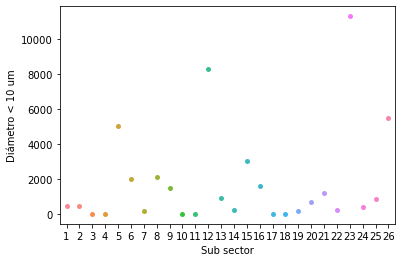

In [13]:
plt.figure()
sns.swarmplot(x='Sub sector', y='Diámetro < 10 um', data=air_pollutant)
plt.show()

Y hacemos lo mismo pero para las partículas con diámetro menor a 25 um.

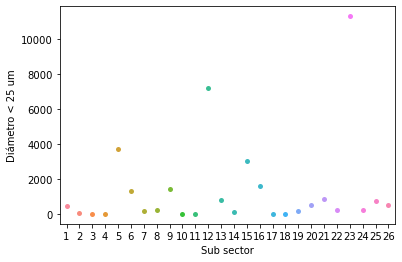

In [14]:
plt.figure()
sns.swarmplot(x='Sub sector', y='Diámetro < 25 um', data=air_pollutant)
plt.show()